Installing ipx2numpy first

In [79]:
!pip install idx2numpy

Importing required libraries

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import idx2numpy

Changing idx files to np arrays

In [81]:
# To get the files go to: https://www.kaggle.com/datasets/hojjatk/mnist-dataset

train_images = idx2numpy.convert_from_file('/content/train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('/content/train-labels.idx1-ubyte')
test_images = idx2numpy.convert_from_file('/content/t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('/content/t10k-labels.idx1-ubyte')

Visualizing a random image

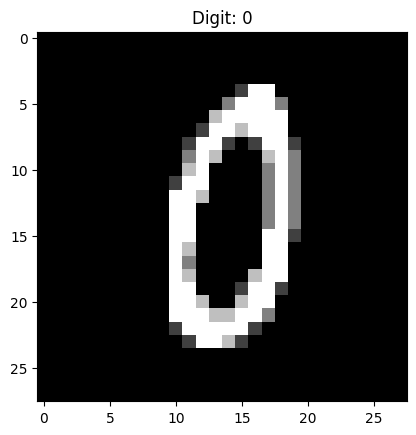

In [82]:
random_index = np.random.randint(0, len(train_images))
random_image = train_images[random_index]

plt.imshow(random_image, cmap='gray')
plt.title(f"Digit: {train_labels[random_index]}")
plt.show()

Reshaping the shapes for SVM supported shapes

In [83]:
train_images_reshaped = train_images.reshape(len(train_images), -1)
test_images_reshaped = test_images.reshape(len(test_images), -1)

Splitting into training and testing set

In [84]:
X_train, X_test, y_train, y_test = train_test_split(train_images_reshaped, train_labels, test_size=0.2, random_state=1)

Standard Scaling the input

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Fitting the data into model

In [86]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=1)

svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=1)

Predicting the result

In [87]:
y_pred = svm_classifier.predict(X_test_scaled)

Calculating the accuracy upto 2 decimal points

In [88]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.07%
